Mary Nathalie Dela Cruz
2015-09114

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import time

# I. Perceptron Classifier Construction

Generate data consisting of 100 two-dimensional vectors taken from a normal distribution with µ1 = [0, 0]T, σ1 = I and label them as class ”-1”. Form a class ”-1” training subset by setting aside 50 points and let the remaining 50 points serve as part of the test set. Do the same for class ”+1” for another normal distribution with µ2 = [10, 10]T, σ2 = I. Merge the subsets to form the training and test sets.

In [17]:
np.random.seed(0)

mu_minus1 = np.array([0 ,0 ])
mu_plus1 = np.array([10,10])
cov = np.eye(2)

label_minus1 = np.ones((50,1)) * -1
label_plus1 = np.ones((50,1))

data_minus1 = np.random.multivariate_normal(mu_minus1, cov, 100)
data_plus1 = np.random.multivariate_normal(mu_plus1, cov, 100)

train_minus1 = data_minus1[:50]
test_minus1 = data_minus1[50:]

train_plus1 = data_plus1[:50]
test_plus1 = data_plus1[50:]

train_Y = np.concatenate((label_minus1, label_plus1), axis=0)
test_Y = train_Y
train_X = np.concatenate((train_minus1, train_plus1), axis=0)
test_X = np.concatenate((test_minus1, test_plus1), axis=0)

print(f"Train Features Size: {train_X.shape}")
print(f"Test Features Size: {test_X.shape}")

print(f"Train Features: \n{train_X}")
#print(f"Test Features: \n{test_X}")

print(f"Train Labels: {train_Y.shape}")
print(f"Test Labels: {test_Y.shape}")

print(f"Train Labels: \n{train_Y}")
#print(f"Test Labels: \n{test_Y}")

Train Features Size: (100, 2)
Test Features Size: (100, 2)
Train Features: 
[[ 1.76405235e+00  4.00157208e-01]
 [ 9.78737984e-01  2.24089320e+00]
 [ 1.86755799e+00 -9.77277880e-01]
 [ 9.50088418e-01 -1.51357208e-01]
 [-1.03218852e-01  4.10598502e-01]
 [ 1.44043571e-01  1.45427351e+00]
 [ 7.61037725e-01  1.21675016e-01]
 [ 4.43863233e-01  3.33674327e-01]
 [ 1.49407907e+00 -2.05158264e-01]
 [ 3.13067702e-01 -8.54095739e-01]
 [-2.55298982e+00  6.53618595e-01]
 [ 8.64436199e-01 -7.42165020e-01]
 [ 2.26975462e+00 -1.45436567e+00]
 [ 4.57585173e-02 -1.87183850e-01]
 [ 1.53277921e+00  1.46935877e+00]
 [ 1.54947426e-01  3.78162520e-01]
 [-8.87785748e-01 -1.98079647e+00]
 [-3.47912149e-01  1.56348969e-01]
 [ 1.23029068e+00  1.20237985e+00]
 [-3.87326817e-01 -3.02302751e-01]
 [-1.04855297e+00 -1.42001794e+00]
 [-1.70627019e+00  1.95077540e+00]
 [-5.09652182e-01 -4.38074302e-01]
 [-1.25279536e+00  7.77490356e-01]
 [-1.61389785e+00 -2.12740280e-01]
 [-8.95466561e-01  3.86902498e-01]
 [-5.10805138e

Write code named classify(· · · ) that implements the Pocket Algorithm for perceptron learning. Set maxitercnt to 10000 iterations.

In [19]:
def classify(features, labels, maxitercnt = 10000):
    N, d = features.shape #
    
    v = np.zeros(d+1) # current weight vector for the perceptron
    w = np.zeros(d+1) # outputs weight vector corresponding to a trained neuron
    wo = np.ones(N) # bias
    features = np.c_[wo, features]
    
    itercnt = 0
    nv = 0 # number of consecutive iterations for which weight vector v correctly classified the examples
    nw = 0 # number of consecutive iterations for which weight vector w correctly classified the examples
    
    while itercnt < maxitercnt:
        j = np.random.randint(N)
        xj = features[j]
        yj = labels[j]

        y_hat = np.sign(np.dot(v, xj))

        if y_hat * yj > 0:
            nv += 1
        else:
            if nv > nw:
                w = v
                nw = nv
            v = v + yj * xj
            nv = 0

        itercnt += 1 
    
    return w

Write code named predict(· · · ) to test the classifier and measure the sum of square errors for the test set.

In [20]:
def prediction(features, weights, labels = None):
    N, d = features.shape
    bias = weights[0]
    weight = weights[1:]
    prediction = features * weight
    predict = np.sign(prediction.sum(axis=1).reshape(-1, 1) + bias)
    
    if labels is not None:
        cnt = sum(predict[i] != labels[i] for i in range(len(predict)))
        sse = sum((cnt)**2)/N
        return predict, sse

    return predict

In [21]:
weight = classify(train_X, train_Y)
predict, sse = prediction(test_X, weight, test_Y)

print(sse)

0.09


# II. Adaboost Construction and Evaluation

### Input Data

In [22]:
data_banana = np.loadtxt("AI201_PA4_Data/banana_data.csv", delimiter=",", dtype=float)
data_splice = np.loadtxt("AI201_PA4_Data/splice_data.csv", delimiter=",", dtype=float)

print(f'Banana: {data_banana.shape}')
print(f'Banana Data Y: {set(data_banana[:,0])}')
print(f'Banana Data X: {np.unique(data_banana[:,1:])}')
print(f'Banana Data D (Number of Features): {len(np.unique(data_banana[:,1:]))}')
print(f'Splice: {data_splice.shape}')
print(f'Splice Data Y: {set(data_splice[:,0])}')
print(f'Splice Data X: {np.unique(data_splice[:,1:])}')
print(f'Splice Data D (Number of Features): {len(np.unique(data_splice[:,1:]))}')

Banana: (5300, 3)
Banana Data Y: {1.0, -1.0}
Banana Data X: [-3.0898387 -2.9808342 -2.8360574 ...  2.7544469  2.8133603  3.1943016]
Banana Data D (Number of Features): 10600
Splice: (2991, 61)
Splice Data Y: {1.0, -1.0}
Splice Data X: [1. 2. 3. 4.]
Splice Data D (Number of Features): 4


Following the Adaboost pseudocode presented in the previous section, write code called adabtrain that implements the Adaboost algorithm with the Pocket Algorithm as the basic learner. Write code named adabpredict that classifies unknown/unseen data. Using adabtrain and adabpredict, train the boosted perceptron algorithm and measure the training and test accuracies for the ensemble classifier having K learners.

In [23]:
def adabtrain(S, K):
    X = S[:,1:]
    Y = S[:,0].reshape(-1,1)
    
    N = len(Y)
    D = len(np.unique(X))
    ind = range(len(S))
    
    w = np.ones(N) * (1/N)
    
    list_h = []
    list_alpha =  []
    
    for i in range(K):
        ind_st = np.random.choice(ind, size=N, p=w)
        st = np.array([S[i] for i in ind_st])
        st_X = st[:, 1:]
        st_Y = st[:, 0].reshape(-1,1)
        
        ht = classify(st_X, st_Y)
        Y_pred = prediction(X, ht)

        list_h.append(ht)
        
        err = []
        for j in range(N):
            if Y_pred[j] != Y[j]:
                err.append(w[j])
        
        alpha = 0.5 * np.log((1 - sum(err)) / sum(err))
        list_alpha.append(alpha)
        
        zt = []
        for j in range(N):
            zt.append(w[j] * np.exp(-alpha * Y[j] * Y_pred[j]))
        
        w = np.squeeze(zt/sum(zt))
    
    def adabpredict(x_test):

        list_k = []
        for i in range(K):
            list_k.append(list_alpha[i]*prediction(x_test, list_h[i]))
    
        return np.sign(sum(list_k))
    
    return adabpredict

Write code that automatically plots the training and test accuracies against the number of learners K used for training. Use K = 10, 20, 30, ...1000.

In [24]:
def accuracy_plot(data, train_split, title, K_start, K_end, K_div):
    
    accuracy_list_test = []
    accuracy_list_train = []
    time_list_training = []
    time_list_test_train = []
    time_list_test_test = []
    K_list = range(K_start, K_end, K_div)
    
    for K in K_list:
        tic_training = time.time()
        np.random.seed(K)
        np.random.shuffle(data_banana)
        train = data[:train_split,:]
        test = data[train_split:,:]
        adabpredict = adabtrain(train, K)
        toc_training = time.time()
        time_training = toc_training - tic_training
        time_list_training.append(time_training)
        
        tic_test_train = time.time()
        Y_train = train[:,0]
        X_train = train[:,1:]
        N_train, d_train = X_train.shape
        predictions_train = adabpredict(X_train)
        accuracy_train = sum(predictions_train[i] == Y_train[i] for i in range(len(predictions_train))) / N_train
        accuracy_list_train.append(accuracy_train)
        toc_test_train = time.time()
        time_test_train = toc_test_train - tic_test_train
        time_list_test_train.append(time_test_train)

        tic_test_test = time.time()
        Y_test = test[:,0]
        X_test = test[:,1:]
        N_test, d_test = X_test.shape
        predictions_test = adabpredict(X_test)
        accuracy_test = sum(predictions_test[i] == Y_test[i] for i in range(len(predictions_test))) / N_test
        accuracy_list_test.append(accuracy_test)
        toc_test_test = time.time()
        time_test_test = toc_test_test - tic_test_test
        time_list_test_test.append(time_test_test)
    
    plt.plot(K_list, accuracy_list_train, label='Train Data')
    plt.plot(K_list, accuracy_list_test, label='Test Data')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Accuracy of ' +title)
    plt.show()
    
    plt.plot(K_list, time_list_training, label='Training with Train Data')
    #plt.plot(K_list, time_list_test_train, '-o', label='Testing with Train Data')
    #plt.plot(K_list, time_list_test_test, '-o', label='Testing with Test Data')
    plt.xlabel('K')
    plt.ylabel('Time Diff')
    #plt.legend()
    plt.title('Time Diff of ' +title)
    plt.show()
    
    return accuracy_list_test, accuracy_list_train, time_list_training, time_list_test_train, time_list_test_test, K_list

### Banana Dataset

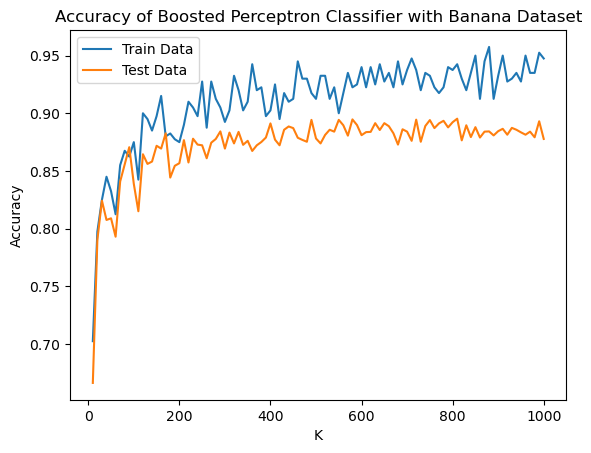

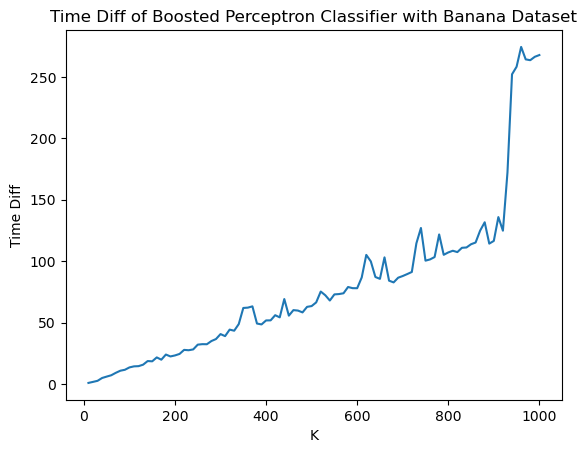

In [6]:
accuracy_list_test_b, accuracy_list_train_b, time_list_training_b, time_list_test_train_b, time_list_test_test_b, K_list_b = accuracy_plot(data_banana, 400, 'Boosted Perceptron Classifier with Banana Dataset', 10, 1010, 10)

### Splice Dataset

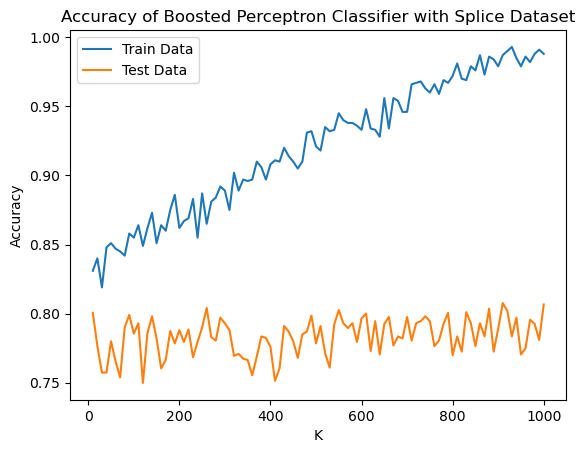

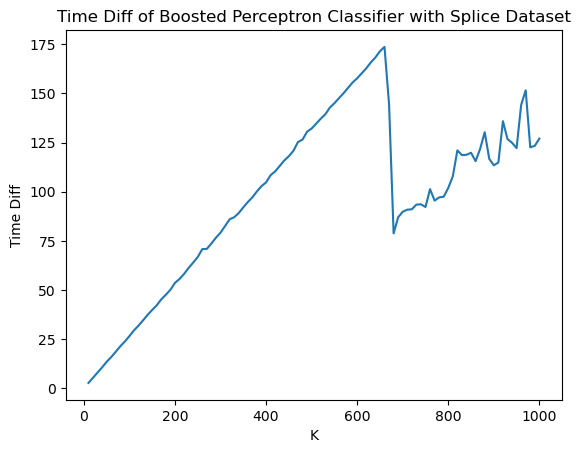

In [7]:
accuracy_list_test_s, accuracy_list_train_s, time_list_training_s, time_list_test_train_s, time_list_test_test_s, K_list_s = accuracy_plot(data_splice, 1000, 'Boosted Perceptron Classifier with Splice Dataset', 10, 1010, 10)

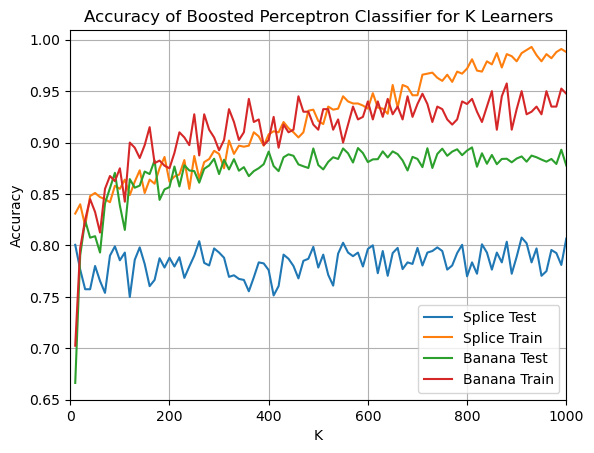

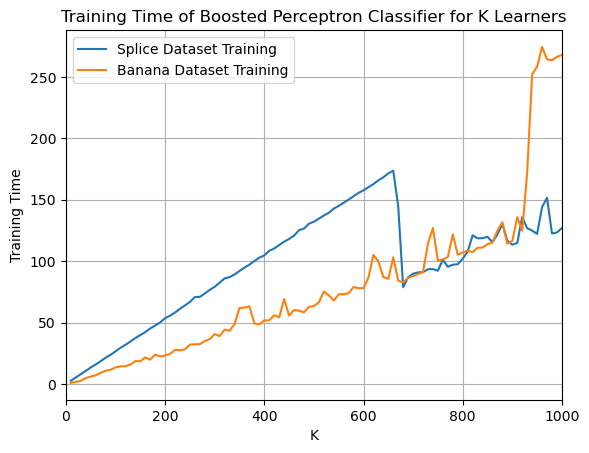

In [15]:
y1 = accuracy_list_test_s
y2 = accuracy_list_train_s
y3 = accuracy_list_test_b 
y4 = accuracy_list_train_b

t1 = time_list_training_s
t2 = time_list_training_b

xb = K_list_b
xs = K_list_s

plt.plot(xs, y1, label = "Splice Test")
plt.plot(xs, y2, label = "Splice Train")
plt.plot(xb, y3, label = "Banana Test")
plt.plot(xb, y4, label = "Banana Train")
plt.xlim((0,1000))
plt.title('Accuracy of Boosted Perceptron Classifier for K Learners')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

plt.plot(xs, t1, label = "Splice Dataset Training")
plt.plot(xb, t2, label = "Banana Dataset Training")
plt.title('Training Time of Boosted Perceptron Classifier for K Learners')
plt.xlim((0,1000))
plt.xlabel('K')
plt.ylabel('Training Time')
plt.grid()
plt.legend()
plt.show()